# Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

temp = data.iloc[:,4:].columns
dates = pd.date_range(start=temp[0], end=temp[-1])
X = pd.DataFrame(np.arange(1, len(dates) + 1))

y = data.iloc[136, 4:]

# Use Cross Validation - find best degree polynomial

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Which degree polynomial is best (1-20)?

In [4]:
d_range = range(1, 21)


d_scores = []

for d in d_range:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    d_scores.append(np.sqrt(-cross_val_score(lin_reg, X_poly, y, cv=10, scoring='neg_mean_squared_error')).mean())
    
    
d_scores

[3241.9033624374906,
 1308.6947948758552,
 1486.7143529075859,
 1606.3945201636839,
 623.1993423948755,
 1724.0890385075459,
 1602.8284531569254,
 921.7165322418438,
 1913.5765034429533,
 2787.943154124784,
 2761.298043266412,
 3096.0913323304003,
 2070.649012898566,
 535.0549958602649,
 3663.5230937053975,
 7584.45074753247,
 11725.802260944252,
 15436.437530463507,
 17944.376793269643,
 18459.523155518258]

# Plot the scores

* Looks like 5 is the best (over 15 mass overfitting)

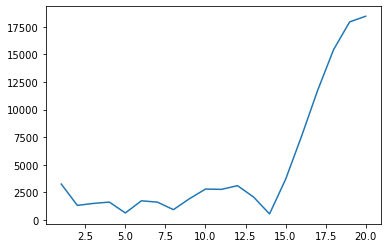

In [5]:
plt.plot(d_range, d_scores)
plt.show()

# Train model on 5th degree Polynomial

In [8]:
lin_reg = LinearRegression()
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
lin_reg.fit(X_poly, y)

scores = cross_val_score(lin_reg, X_poly, y, cv=10, scoring='neg_mean_squared_error')
print(scores)
mse_scores = -scores
print(mse_scores)

rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

print(rmse_scores.mean())


y_pred = lin_reg.predict(X_poly)
y_pred.shape

[-19427714.07750985   -988569.30534798    -51865.00415002
   -870564.95509493   -640064.98123041   -906883.36842869
  -2392039.05959663  -1038507.059954     -996664.02699025
 -17512888.76112759]
[19427714.07750985   988569.30534798    51865.00415002   870564.95509493
   640064.98123041   906883.36842869  2392039.05959663  1038507.059954
   996664.02699025 17512888.76112759]
[4407.68806491  994.26822606  227.73889468  933.04070388  800.04061224
  952.30424153 1546.62182178 1019.07166576  998.33062008 4184.84035073]
1606.3945201636839


(95,)

# Plot vs actual cases

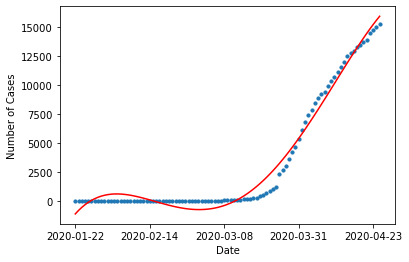

In [9]:
plt.plot(dates, y_pred, label='predictions', color='r')
plt.scatter(dates, y, label='actual cases', s=10)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(dates[0::23])
#plt.legend=(loc='top left')
plt.show()

# Create dates from 1/22/20 - 1/22/21

In [10]:
from datetime import date

year_dates = pd.date_range(start="1/22/20",end="1/22/21")
#year_dates = pd.date_range(start="2020-01-22",end="2021-01-22")


print(type(year_dates))
print(year_dates)
print(year_dates.shape)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22'],
              dtype='datetime64[ns]', length=367, freq='D')
(367,)


# Make predictions on 365 days (year_dates)

In [11]:
X_year = pd.DataFrame(np.arange(1, len(year_dates)+1))

X_year_poly = poly.fit_transform(X_year)

y_pred_year = lin_reg.predict(X_year_poly)
y_pred_year.shape

(367,)

# Plot predicted cases for a year

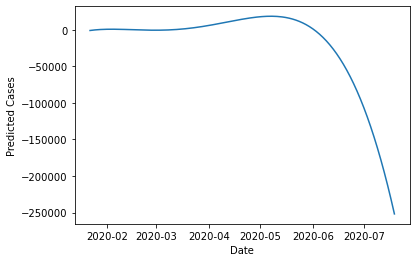

In [12]:
plt.plot(year_dates[0:180], y_pred_year[0:180], label='predictions')
#plt.plot(dates, y_pred, label='predictions', color='r')

#plt.xticks(year_dates[1:110:25])
plt.xlabel('Date')
plt.ylabel('Predicted Cases')
plt.show()